In [9]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [10]:
# Create engine
engine = create_engine('postgresql://localhost:5432/employeeSQL')
connection = engine.connect()


In [11]:
# Query all records in the the 'Salaries' table
salary_df = pd.read_sql_table(
    'salaries',
    con=engine
)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


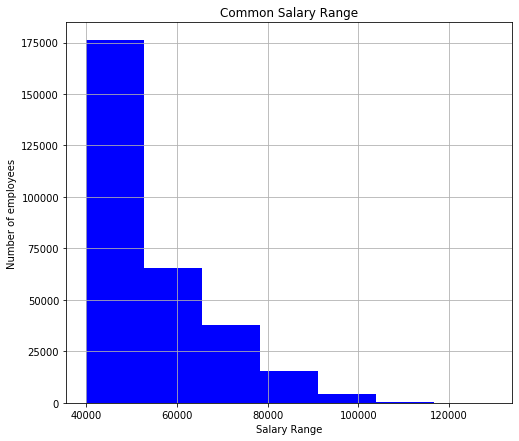

In [16]:
# Plot the histogram 
plt.figure(figsize = (8,7))
plt.hist(salary_df["salary"],bins = 7, color = 'blue')
plt.grid(True)
plt.xlabel("Salary Range")
plt.ylabel("Number of employees")
plt.title("Common Salary Range")
plt.savefig("Images/common_salary_range.png")

# salary_df.plot.hist(bins = 8)



In [13]:
# Query all records in the the 'Employees' table
employee_df = pd.read_sql_table(
    'employees',
    con=engine
)

# Merge the 'employee_df' and 'salary_df'
employee_salary = pd.merge(left = employee_df, right = salary_df, how = "inner", on = "emp_no")

# Rename the column
employee_salary = employee_salary.rename(columns = {"emp_title_id" : "title_id"})
employee_salary.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [14]:
# Query all records in the the 'Title' table
title_df = pd.read_sql_table(
    'titles',
    con=engine
)

# Merge the above DataFrame and 'title_df'
combined_df = pd.merge(left = employee_salary, right = title_df, how = "inner", on = "title_id")
combined_df.head()


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


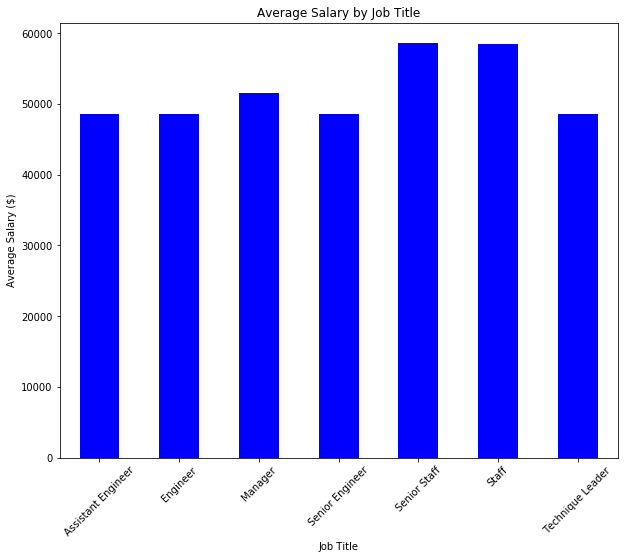

In [15]:
# Group the DataFrame on 'title' and get the mean of 'salary'
salary_title = combined_df.groupby(['title'])['salary'].mean()

# Plot a bar plot
salary_title.plot(kind = 'bar', figsize = (10, 8), color = 'blue', rot = 45)

plt.xlabel("Job Title")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary by Job Title")
plt.savefig("Images/avg_salary_job_title.png")



# Observation:

As per the above bar chart, we see that the average salary of assistant engineer, engineer, senior engineer and technique leader are almost same which is practically incorrect. The salary of staff and senior staff are almost same and highest among other cadres. The salary of senior staff and staff is more than manager which is totally vague.